# Import Modules

In [1]:
import nltk
nltk.download("popular")
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import string
from nltk.corpus import stopwords
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/stef/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/stef/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/stef/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/stef/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/stef/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/stef/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    

# Load Dataset

In [2]:
data = pd.read_csv("dataset.csv")
data.head()

,index,source_text,smishing_text,label
0,0,Your bank statement is ready for viewing. Log ...,Urgent: Suspicious activity detected. Log in t...,1
1,1,Your package is on its way! Track it using our...,Delivery issue: Your package is on hold. Click...,1
2,2,You are receiving this update on your recent p...,Thank you for your purchase! Verify your infor...,1
3,3,Your account balance is available. Please log ...,Attention! Account balance alert: Immediate ac...,1
4,4,Update your app to the latest version in the A...,Your account requires immediate update. Click ...,1


In [3]:
data['label'].value_counts()
# 1 = scam and 0 = safe 

label
1    131
0     70
Name: count, dtype: int64

In [4]:
data.shape
# number of rows

(201, 4)

# Clean Text

In [5]:
def preprocess_text(text):
    #remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    #convert to lowercase
    text = text.lower()
    #remove stop words that are super common *most important*
    stop_words = set(stopwords.words('english'))
    text = " ".join((word for word in text.split() if word not in stop_words))
    return text
    
preprocess_text("This is a Te$T for / dum,my ^ text")

'tet dummy text'

In [6]:
data['source_text'] = data['source_text'].apply(preprocess_text)
data['smishing_text'] = data['smishing_text'].apply(preprocess_text)

In [7]:
data

,index,source_text,smishing_text,label
0,0,bank statement ready viewing log online bankin...,urgent suspicious activity detected log secure...,1
1,1,package way track using official app,delivery issue package hold click confirm address,1
2,2,receiving update recent purchase,thank purchase verify information confirm,1
3,3,account balance available please log view,attention account balance alert immediate acti...,1
4,4,update app latest version app store,account requires immediate update click install,1
...,...,...,...,...
196,196,subscription benefits renewed,enjoy uninterrupted access services,0
197,197,mortgage payment received thank staying current,updated balance reflected account,0
198,198,flight checkin available online great trip,ensure travel documents ready departure,0
199,199,customer service request logged we’ll reach soon,expect update within next 24 hours,0


# Vectorization

In [8]:
vectorization_data = TfidfVectorizer()
X = vectorization_data.fit_transform(data['source_text'] + " " + data['smishing_text'])

In [9]:
y = data['label']

# Train Test Split

In [10]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Applying Logistic Regression

In [13]:
model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(x_test)

print("Accuracy", accuracy_score(y_test, y_pred))
print("Classification", classification_report(y_test, y_pred))
print("confusion", confusion_matrix(y_test, y_pred))

Accuracy 0.8048780487804879
Classification               precision    recall  f1-score   support

           0       1.00      0.43      0.60        14
           1       0.77      1.00      0.87        27

    accuracy                           0.80        41
   macro avg       0.89      0.71      0.74        41
weighted avg       0.85      0.80      0.78        41

confusion [[ 6  8]
 [ 0 27]]


# Random Forest Model

In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, random_state = 42)

model.fit(X_train, y_train)

y_pred =  model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:", classification_rep)
print(cm)

Accuracy: 0.926829268292683
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.90      1.00      0.95        27

    accuracy                           0.93        41
   macro avg       0.95      0.89      0.91        41
weighted avg       0.93      0.93      0.92        41

[[11  3]
 [ 0 27]]


# Naiv Bays Model

In [30]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.8536585365853658
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.57      0.73        14
           1       0.82      1.00      0.90        27

    accuracy                           0.85        41
   macro avg       0.91      0.79      0.81        41
weighted avg       0.88      0.85      0.84        41

Confusion Matrix:
[[ 8  6]
 [ 0 27]]


# SVM

In [37]:
from sklearn.svm import SVC

model = SVC(kernel = 'linear', random_state = 42)

model.fit(X_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix")
print(cm)

Accuracy: 0.9512195121951219
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.96      0.96      0.96        27

    accuracy                           0.95        41
   macro avg       0.95      0.95      0.95        41
weighted avg       0.95      0.95      0.95        41

Confusion Matrix
[[13  1]
 [ 1 26]]


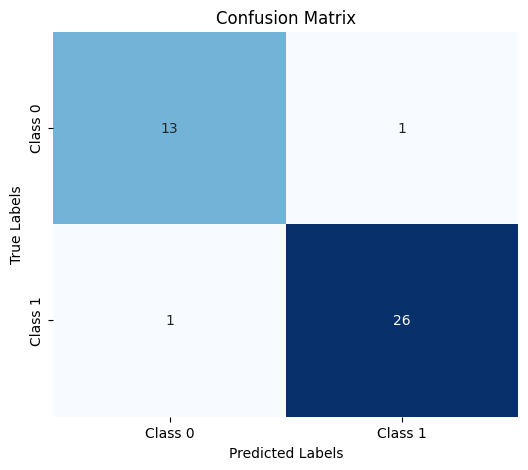

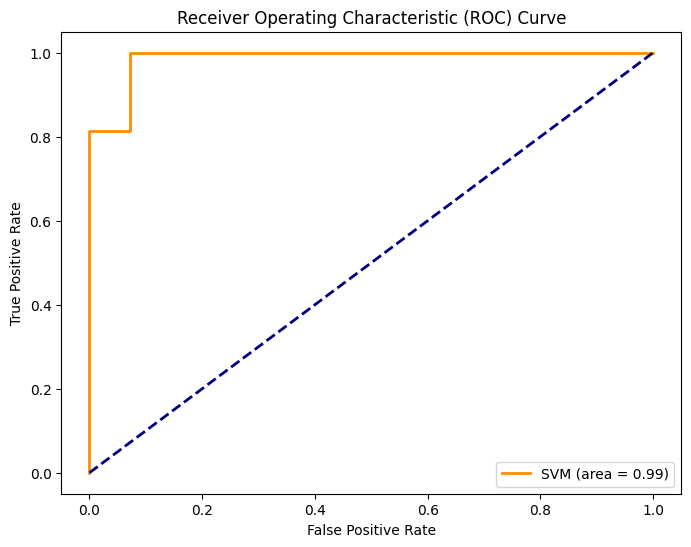

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Assuming you already have y_test and y_pred from your SVM model

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.decision_function(x_test))  # using decision function for SVM
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='SVM (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Save SVM and Vectorized

In [32]:
import pickle

pickle.dump(model, open("model.pkl", 'wb'))
pickle.dump(vectorization_data, open('vectorization_data.pkl', 'wb'))

# Load Model and Vectorizer

In [25]:
model = pickle.load(open('model.pkl', 'rb'))
vectorization_data = pickle.load(open('vectorization_data.pkl', 'rb'))

# Detection System

In [26]:
def detect(input_text):
    vectorized_text = vectorization_data.transform([input_text])
    result = model.predict(vectorized_text)
    return "Smishing Detexted" if result[0] == 1 else "No Smishing Detected"

In [27]:
input_text = "Delivery issue: Your package is on hold."
detect(input_text)

'Smishing Detexted'

In [28]:
import sklearn
sklearn.__version__

'1.5.2'